### Install dependencies

In [2]:
!pip install boto3 sagemaker

Defaulting to user installation because normal site-packages is not writeable


### Setup

1. Create a new endpoint at https://us-east-2.console.aws.amazon.com/sagemaker/home?region=us-east-2#/endpoints then set `ENDPOINT` to it's name.
2. You can do inference in a single file or in a entire folder, set the path to it using `INPUT_PATH`

In [1]:
ENDPOINT = "your_endpoint_name"

# local file or folder
INPUT_PATH = "./examples/neptune/"
# INPUT_PATH = "./drones.jpg"

### Run inference

Now that we have set the paths, we will run the images thuru amazon sagemaker's endpoint.

Note: This assumes you have created the endpoint and a IAM access been configured.

In [4]:
import os
import glob
import json
import boto3
import sagemaker

ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif', 'webp', 'bmp'])

def getFiles(base):
    if os.path.isfile(base):
        return [base]
    else:
        return glob.glob(os.path.join(base, '**'), recursive=True)
    
# initalize client
sagemaker = boto3.client(
    'runtime.sagemaker',
    region_name='us-east-2'
)

flist = getFiles(INPUT_PATH)
print("Processing: {} files...".format(len(flist)))

for fpath in flist:
    ext = fpath.split('.')[-1].lower() if '.' in fpath else None
    
    # skip unsupported / invalid file extensions
    if ext is None or ext not in ALLOWED_EXTENSIONS:
        continue
    
    # load input
    with open(fpath, 'rb') as fh:
        payload = fh.read()

    # invoke inference
    result = sagemaker.invoke_endpoint(
            EndpointName=ENDPOINT,
            ContentType='image/{}'.format(ext),
            Body=bytearray(payload))

    # sagemaker request raw response
    # print('sagemaker response:\n\n', result, '\n')

    # inference response
    print('file: {} inference response:\n{}\n'.format(
        fpath,
        json.dumps(json.loads(result['Body'].read().decode()), sort_keys=True, indent=4))
    )

Processing: 29 files...
file: ./examples/neptune/us_navy_01-0045.jpeg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 3,
                "confidence": 0.9060637354850769,
                "det_bbox": [
                    0.27096647024154663,
                    0.06494076550006866,
                    0.5437979698181152,
                    0.21127884089946747
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.8617641925811768,
                "det_bbox": [
                    0.16081488132476807,
                    0.26865750551223755,
                    0.6129817366600037,
                    0.4529333710670471
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.8095219731330872,


file: ./examples/neptune/MVI_1615_VIS.avi.210.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 3,
                "confidence": 0.9990155696868896,
                "det_bbox": [
                    0.5585653185844421,
                    0.31929221749305725,
                    0.7768892645835876,
                    0.43661803007125854
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9967834949493408,
                "det_bbox": [
                    0.3287220597267151,
                    0.32812249660491943,
                    0.6077862977981567,
                    0.4339579641819
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9960760474205017,
                "det_bbox

file: ./examples/neptune/amsterdam-port-2015-birdseye-00196.jpeg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 3,
                "confidence": 0.9986465573310852,
                "det_bbox": [
                    0.41017016768455505,
                    0.0,
                    1.0,
                    0.963961124420166
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9985509514808655,
                "det_bbox": [
                    0.1884472519159317,
                    0.46948695182800293,
                    0.3042043447494507,
                    0.747360348701477
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9965726137161255,
                "det_bbox": [
          

file: ./examples/neptune/rotterdam_barge_transfer-00137.jpeg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 3,
                "confidence": 0.9984172582626343,
                "det_bbox": [
                    0.49441641569137573,
                    0.20151734352111816,
                    0.5410676598548889,
                    0.3463374972343445
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.997484564781189,
                "det_bbox": [
                    0.684419572353363,
                    0.25231820344924927,
                    0.7300068140029907,
                    0.38372647762298584
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.8933347463607788,
            

file: ./examples/neptune/amsterdam-port-2015-birdseye-00052.jpeg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 3,
                "confidence": 0.9874473214149475,
                "det_bbox": [
                    0.6750460863113403,
                    0.7219229340553284,
                    0.7404245138168335,
                    0.7756527662277222
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9822016358375549,
                "det_bbox": [
                    0.22831745445728302,
                    0.2767093777656555,
                    0.5550167560577393,
                    0.6461637616157532
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9714378714561462,
         

file: ./examples/neptune/rotterdam_barge_transfer-00361.jpeg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 3,
                "confidence": 0.9953988194465637,
                "det_bbox": [
                    0.4434683620929718,
                    0.205638587474823,
                    0.48133987188339233,
                    0.32980769872665405
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9944943785667419,
                "det_bbox": [
                    0.58151775598526,
                    0.279731810092926,
                    0.617964506149292,
                    0.38426411151885986
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9657567739486694,
                

file: ./examples/neptune/MVI_1627_VIS.avi.510.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 3,
                "confidence": 0.9975402355194092,
                "det_bbox": [
                    0.26629871129989624,
                    0.44333523511886597,
                    0.31189748644828796,
                    0.5322108864784241
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9972928166389465,
                "det_bbox": [
                    0.5427792072296143,
                    0.44897332787513733,
                    0.602564811706543,
                    0.5375102758407593
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9956841468811035,
                "det_b

file: ./examples/neptune/MVI_1578_VIS.avi.60.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 3,
                "confidence": 0.9997149109840393,
                "det_bbox": [
                    0.475870281457901,
                    0.4371669888496399,
                    0.7876014709472656,
                    0.5667650103569031
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9991706609725952,
                "det_bbox": [
                    0.26250311732292175,
                    0.4344596862792969,
                    0.4784856140613556,
                    0.5536137223243713
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9968332648277283,
                "det_bbox"

file: ./examples/neptune/amsterdam-port-2015-birdseye-00031.jpeg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 3,
                "confidence": 0.9985983967781067,
                "det_bbox": [
                    0.7842394709587097,
                    0.04639536142349243,
                    0.8278754353523254,
                    0.21093690395355225
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9980342984199524,
                "det_bbox": [
                    0.8796916007995605,
                    0.42204549908638,
                    0.9159942269325256,
                    0.5961441993713379
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9976673126220703,
          

file: ./examples/neptune/MVI_1645_VIS.avi.240.jpg inference response:
{
    "input.jpg": {
        "detections": [
            {
                "classid": 3,
                "confidence": 0.9994134902954102,
                "det_bbox": [
                    0.6648826599121094,
                    0.4624740183353424,
                    0.772023618221283,
                    0.608055830001831
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9993852376937866,
                "det_bbox": [
                    0.429901123046875,
                    0.469110369682312,
                    0.5136895179748535,
                    0.6128811836242676
                ],
                "label": "ship",
                "scan": "global"
            },
            {
                "classid": 3,
                "confidence": 0.9968221187591553,
                "det_bbox": [

## Run inference and draw

In this example we will draw the bounding boxes into the images

This requires OpenCV2 and matplotlib

In [5]:
%matplotlib inline

Processing: 29 files...


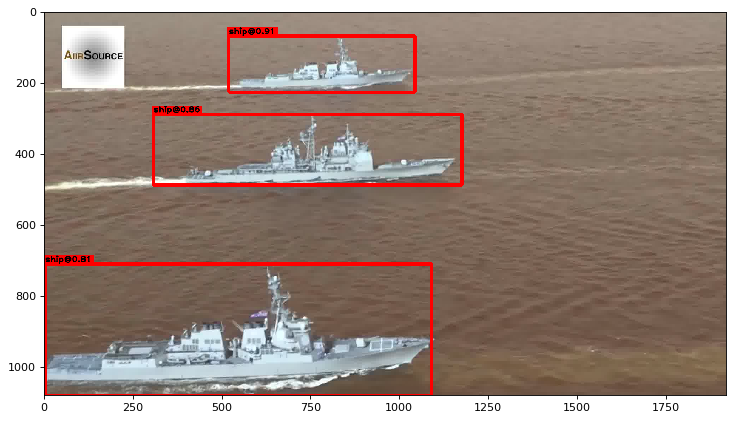

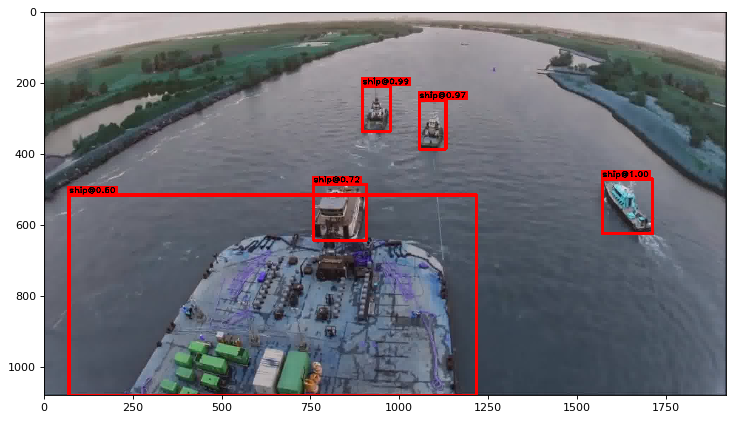

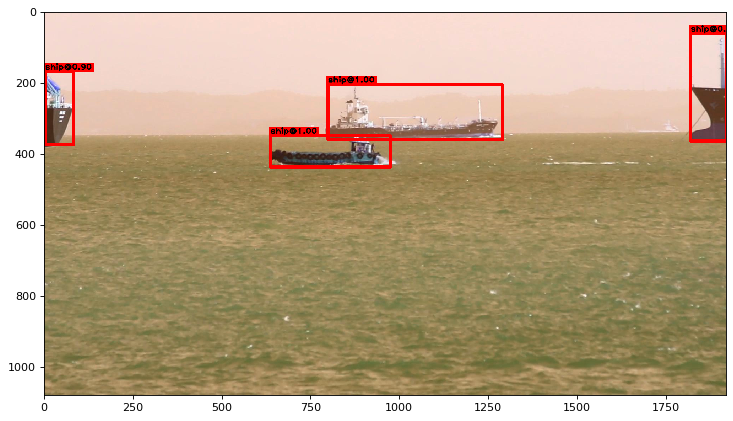

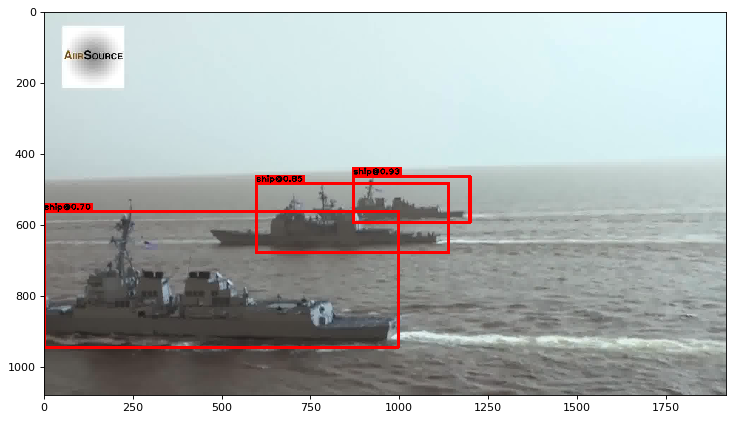

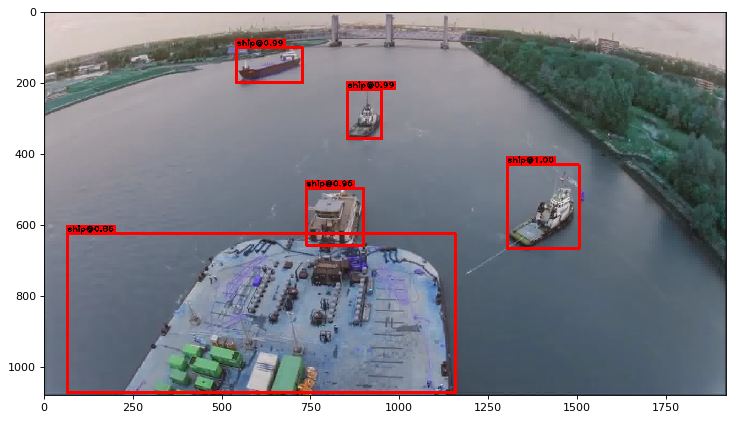

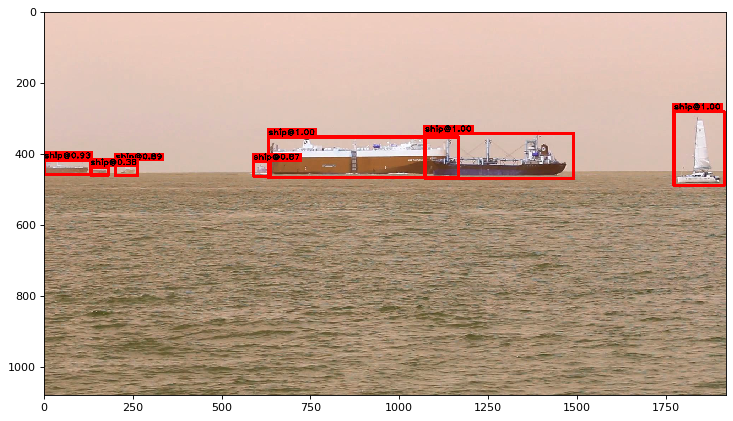

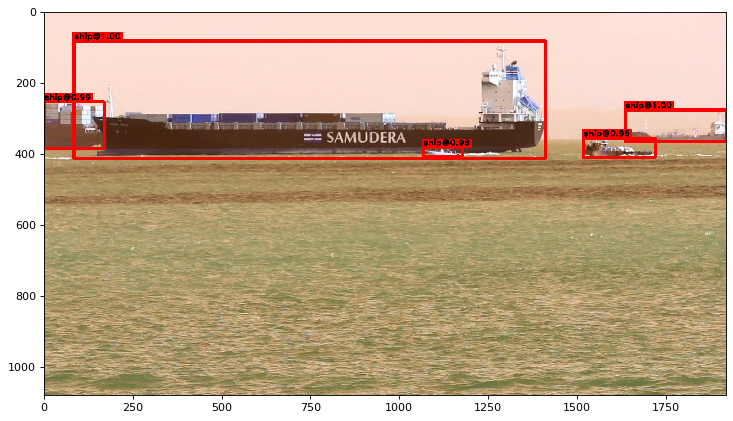

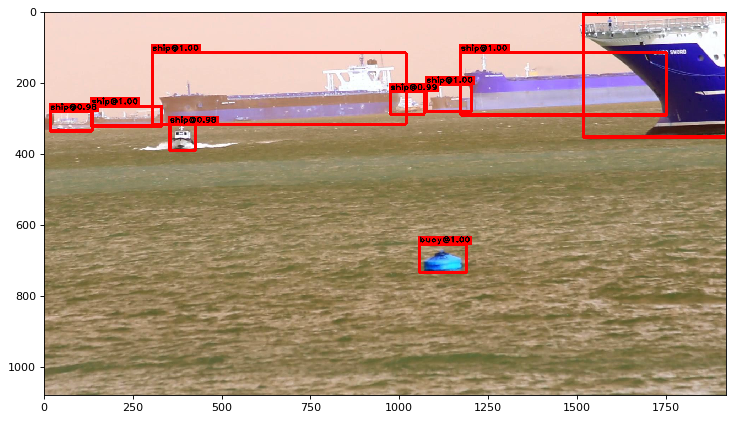

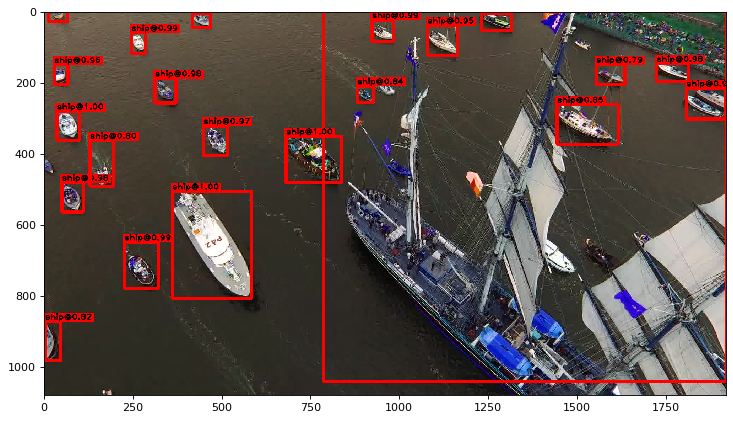

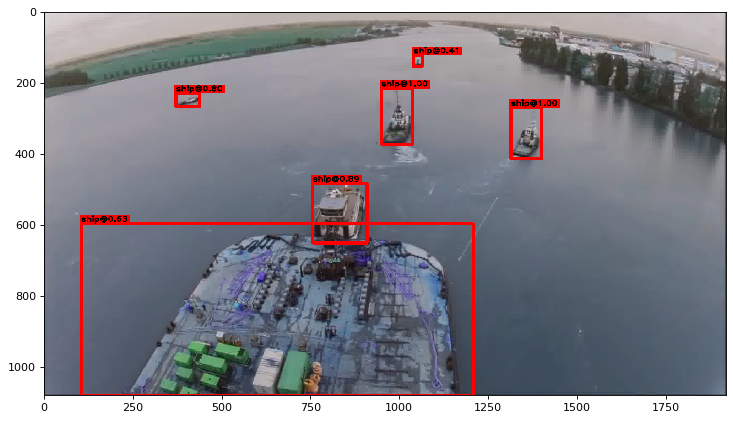

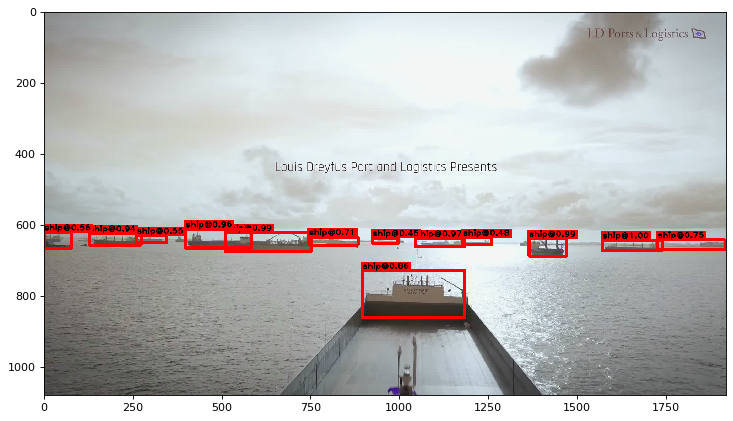

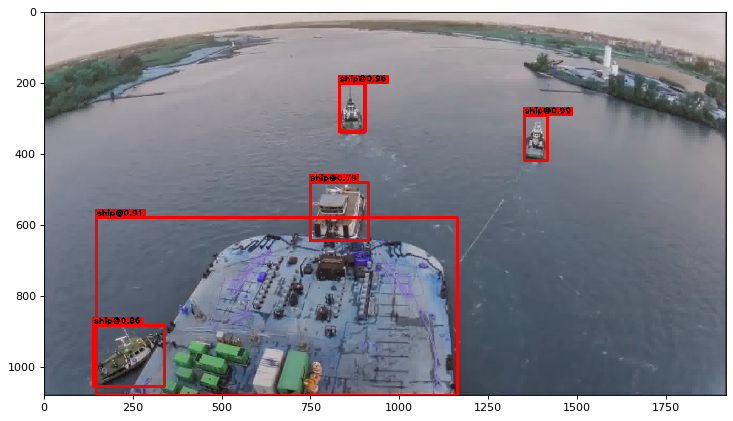

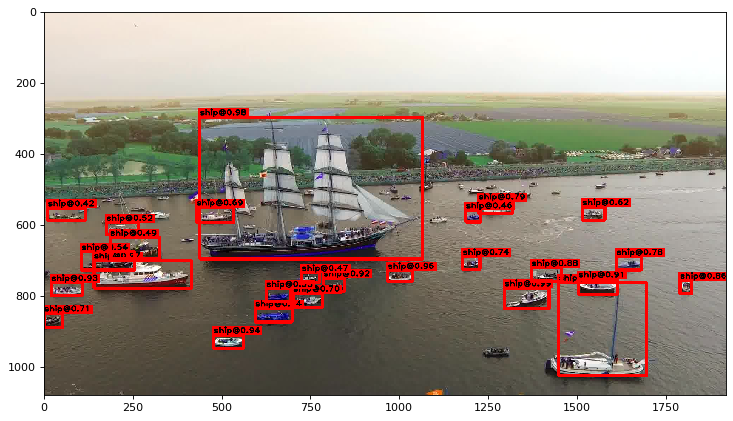

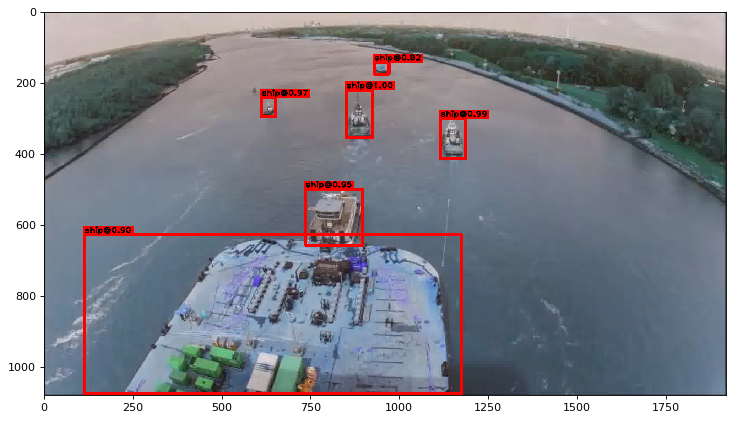

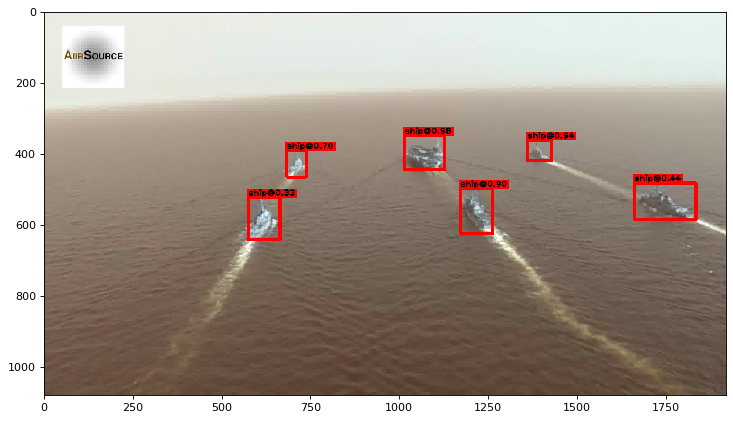

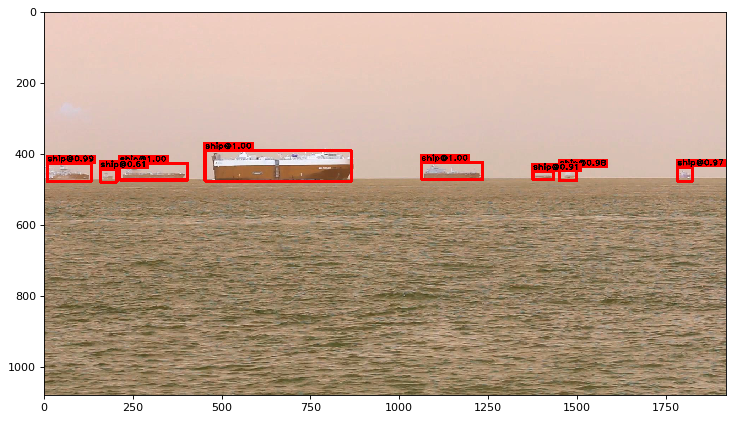

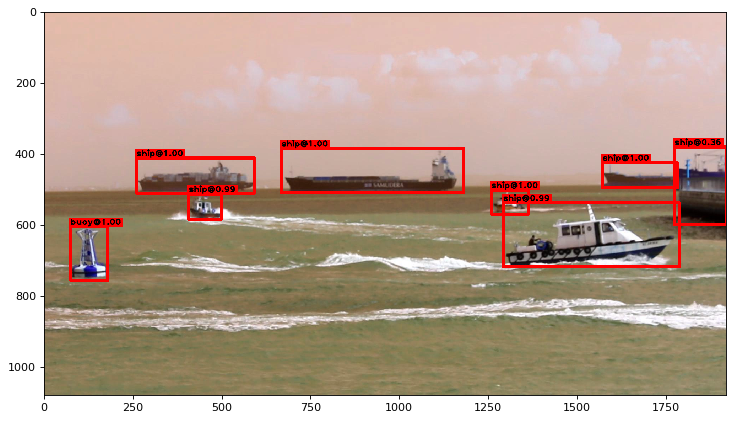

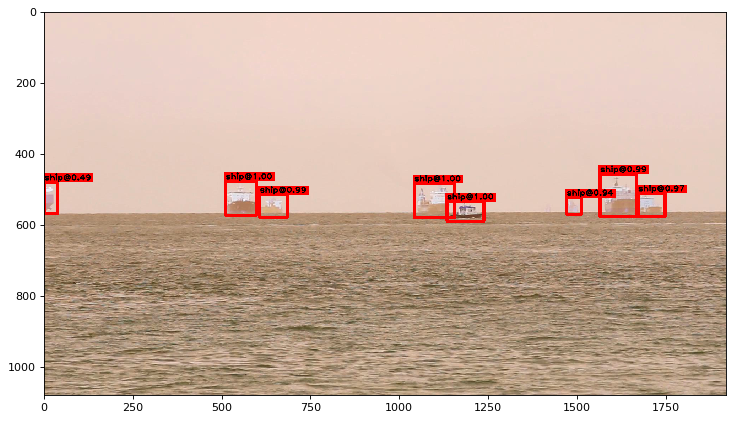

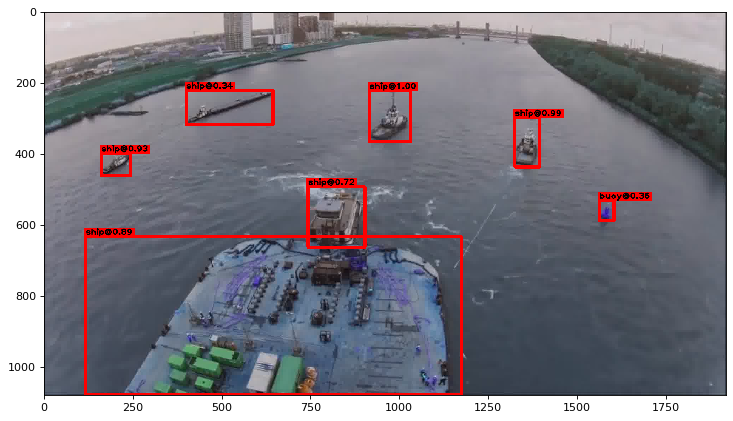

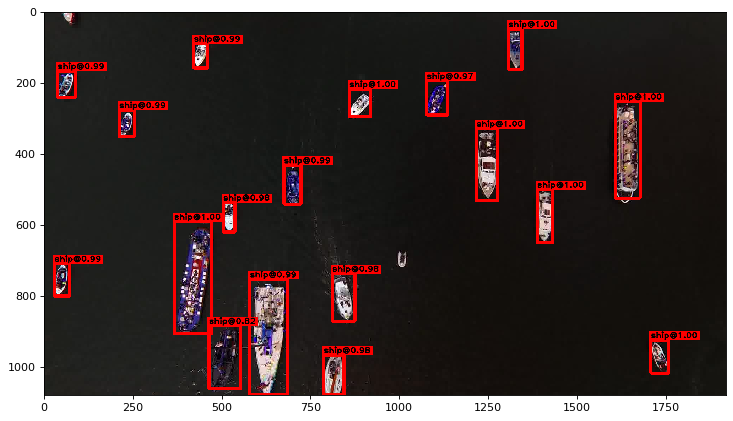

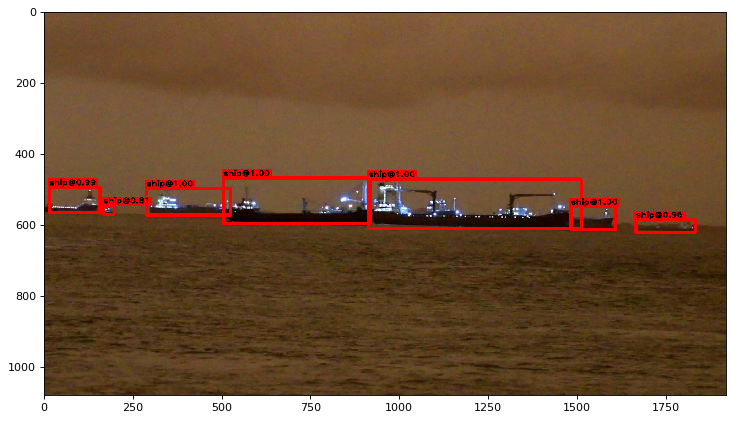

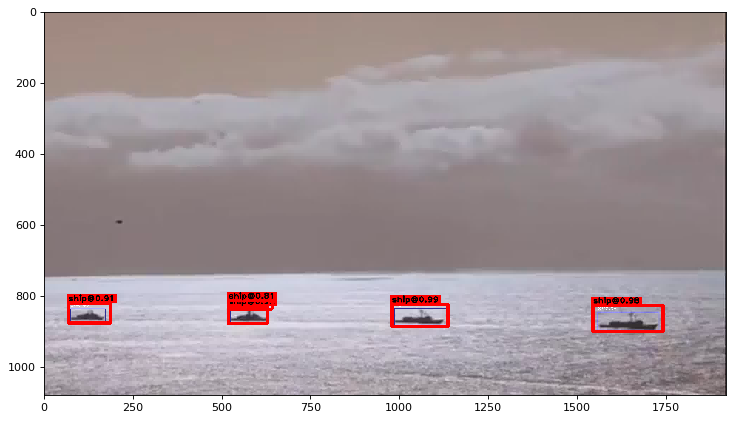

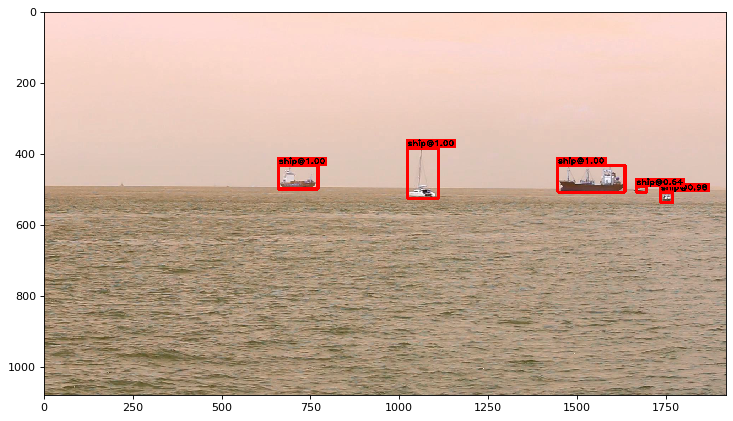

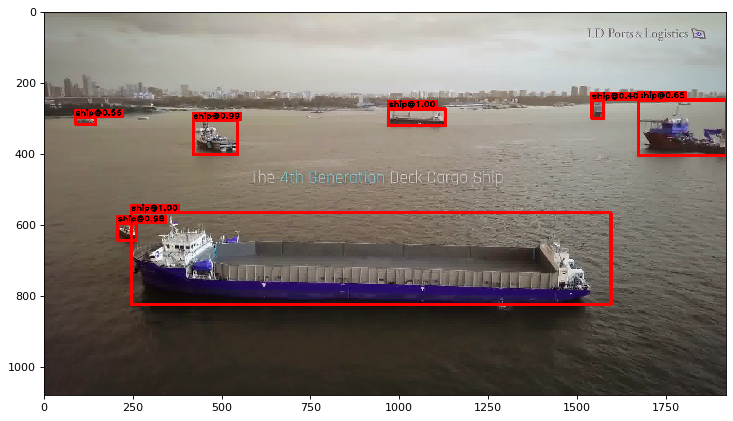

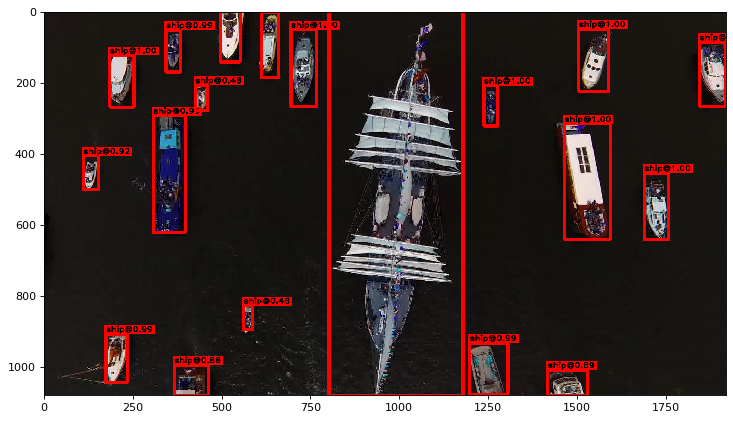

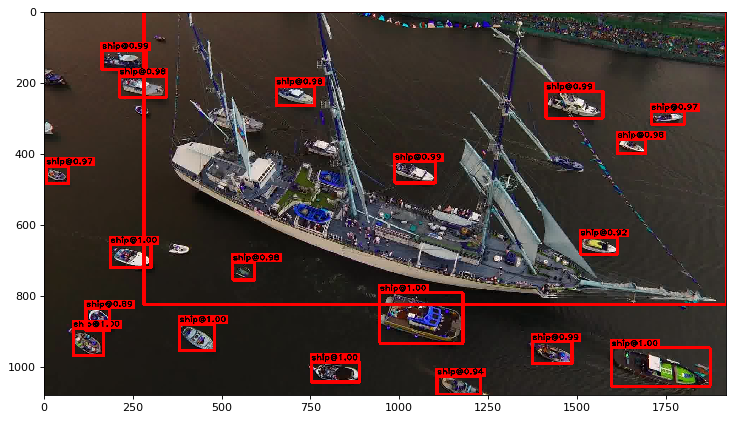

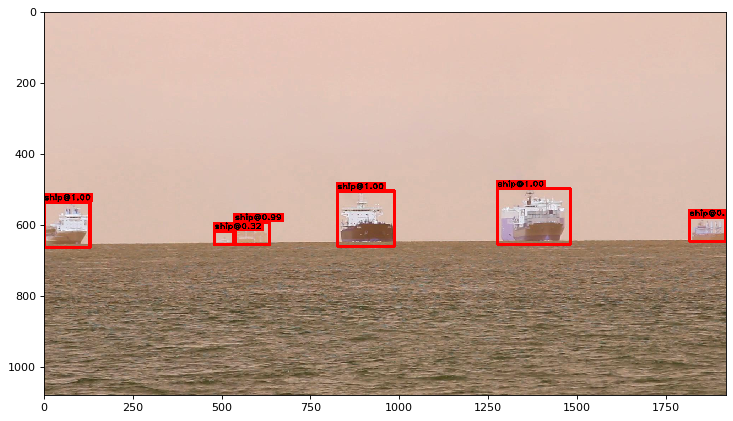

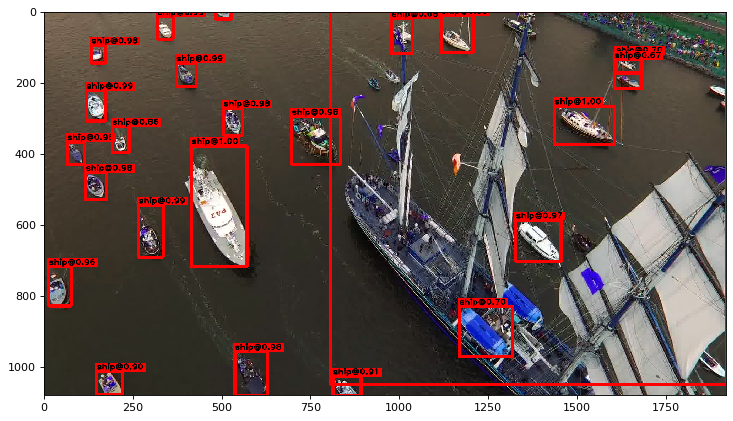

In [8]:
import os
import glob
import json
import boto3
import sagemaker
import cv2

# for displaying images at jupyter notebooks
from matplotlib import pyplot as plt

ALLOWED_EXTENSIONS = set(['png', 'jpg', 'jpeg', 'gif', 'webp', 'bmp'])

def getFiles(base):
    if os.path.isfile(base):
        return [base]
    else:
        return glob.glob(os.path.join(base, '**'), recursive=True)

def drawBB(
    image, header, x, y, xmax, ymax, color=(255, 0, 0), thickness=4*2, text_thickness=1*2,
    text_size=0.8*2, font=cv2.FONT_HERSHEY_PLAIN, footer=""
):
    # bounding box
    cv2.rectangle(image, (x, y), (xmax, ymax), color, thickness)
    
    # header text
    if header != '':
        (text_width, text_height) = cv2.getTextSize(header, font, fontScale=text_size, thickness=text_thickness)[0]
        
        cv2.rectangle(
            image,
            (max(0, int(x-(thickness/2))), max(0, int(y-5-text_height-(thickness/2)))),
            (int(x+text_width+(thickness/2)), int(y)),
            color,
            cv2.FILLED
        )
        
        cv2.putText(image, header, (max(0, x), max(0, y-5)), font, text_size, (0,0,0), text_thickness, cv2.LINE_AA)
        
    if footer != "":
        (footer_width, footer_height) = cv2.getTextSize(footer, font, fontScale=text_size, thickness=text_thickness)[0]
        
        cv2.rectangle(
            image,
            ( int(x-(thickness/2)), int(ymax+(thickness/2)) ),
            ( int(x+footer_width+(thickness/2)), int(ymax+footer_height+(thickness/2)) ),
            color,
            cv2.FILLED
        )
        
        cv2.putText(image, footer, ( x, int(ymax+12+(thickness/2)) ), font, text_size, (0,0,0), text_thickness, cv2.LINE_AA)

# initalize client
sagemaker = boto3.client(
    'runtime.sagemaker',
    region_name='us-east-2'
)

flist = getFiles(INPUT_PATH)
print("Processing: {} files...".format(len(flist)))

for fpath in flist:
    ext = fpath.split('.')[-1].lower() if '.' in fpath else None
    
    # skip unsupported / invalid file extensions
    if ext is None or ext not in ALLOWED_EXTENSIONS:
        continue
    
    # load input
    with open(fpath, 'rb') as fh:
        payload = fh.read()

    # invoke inference
    result = sagemaker.invoke_endpoint(
            EndpointName=ENDPOINT,
            ContentType='image/{}'.format(ext),
            Body=bytearray(payload))
    
    # parse response to json
    response = json.loads(result['Body'].read().decode())
    img = cv2.imread(fpath, 1)
    (height, width, channels) = img.shape
    
    try:
        for det in response['input.jpg']['detections']:
            xmin = det['det_bbox'][0] * width
            ymin = det['det_bbox'][1] * height
            xmax = det['det_bbox'][2] * width
            ymax = det['det_bbox'][3] * height
            
            drawBB(img, '{}@{:.2f}'.format(det['label'], det['confidence']), int(xmin), int(ymin), int(xmax), int(ymax))
    # skip when there's no detections
    except:
        pass
    
    # show image in jupyter
    fig, ax = plt.subplots(figsize=(int(1.05 * height / 100), int(1.05 * width / 100)), dpi=80)
    ax.imshow(img, interpolation='nearest')
    plt.show()
    plt.close()
    
    # ..or just save to disk
    # cv2.imwrite('/path/to/output.jpg', img)
    